# Importing the Dependencies

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('D:\Project\LoanAI\data\loan.csv')

In [103]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



# Data Visualization

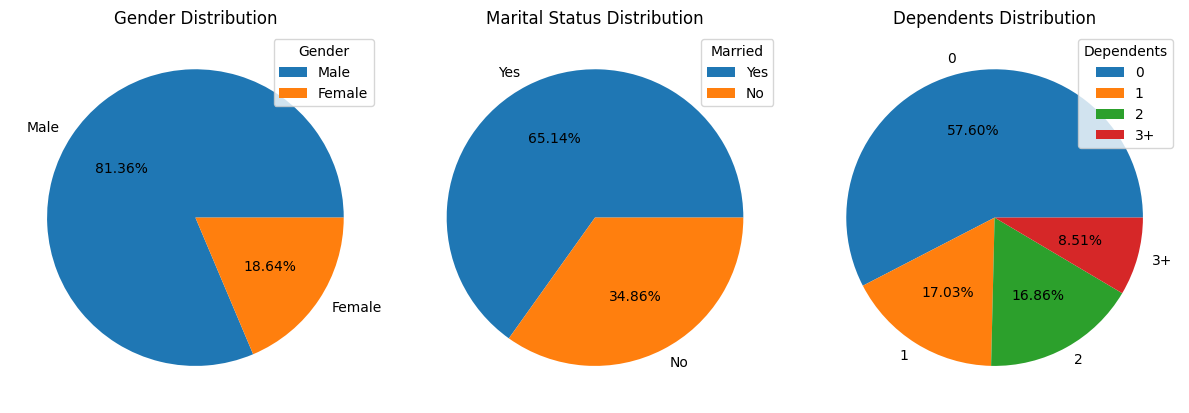

In [106]:
import matplotlib.pyplot as plt

tdf=loan_dataset['Gender'].value_counts().reset_index()
tdf.columns=['Gender','count']
tdf1=loan_dataset['Married'].value_counts().reset_index()
tdf1.columns=['Married','count']
tdf2=loan_dataset['Dependents'].value_counts().reset_index()
tdf2.columns=['Dependents','count']
tdf3=loan_dataset['Education'].value_counts().reset_index()
tdf3.columns=['Education','count']
tdf4=loan_dataset['Self_Employed'].value_counts().reset_index()
tdf4.columns=['Self_Employed','count']

fig,axes=plt.subplots(1,3,figsize=(12,12))
axes=axes.flatten()

axes[0].pie(tdf['count'], labels=tdf['Gender'], autopct='%.2f%%')
axes[0].set_title('Gender Distribution')
axes[0].legend(tdf['Gender'], title="Gender", loc="upper right")

axes[1].pie(tdf1['count'], labels=tdf1['Married'], autopct='%.2f%%')
axes[1].set_title('Marital Status Distribution')
axes[1].legend(tdf1['Married'], title="Married", loc="upper right")

axes[2].pie(tdf2['count'], labels=tdf2['Dependents'], autopct='%.2f%%')
axes[2].set_title('Dependents Distribution')
axes[2].legend(tdf2['Dependents'], title="Dependents", loc="upper right")

plt.tight_layout()
plt.show()

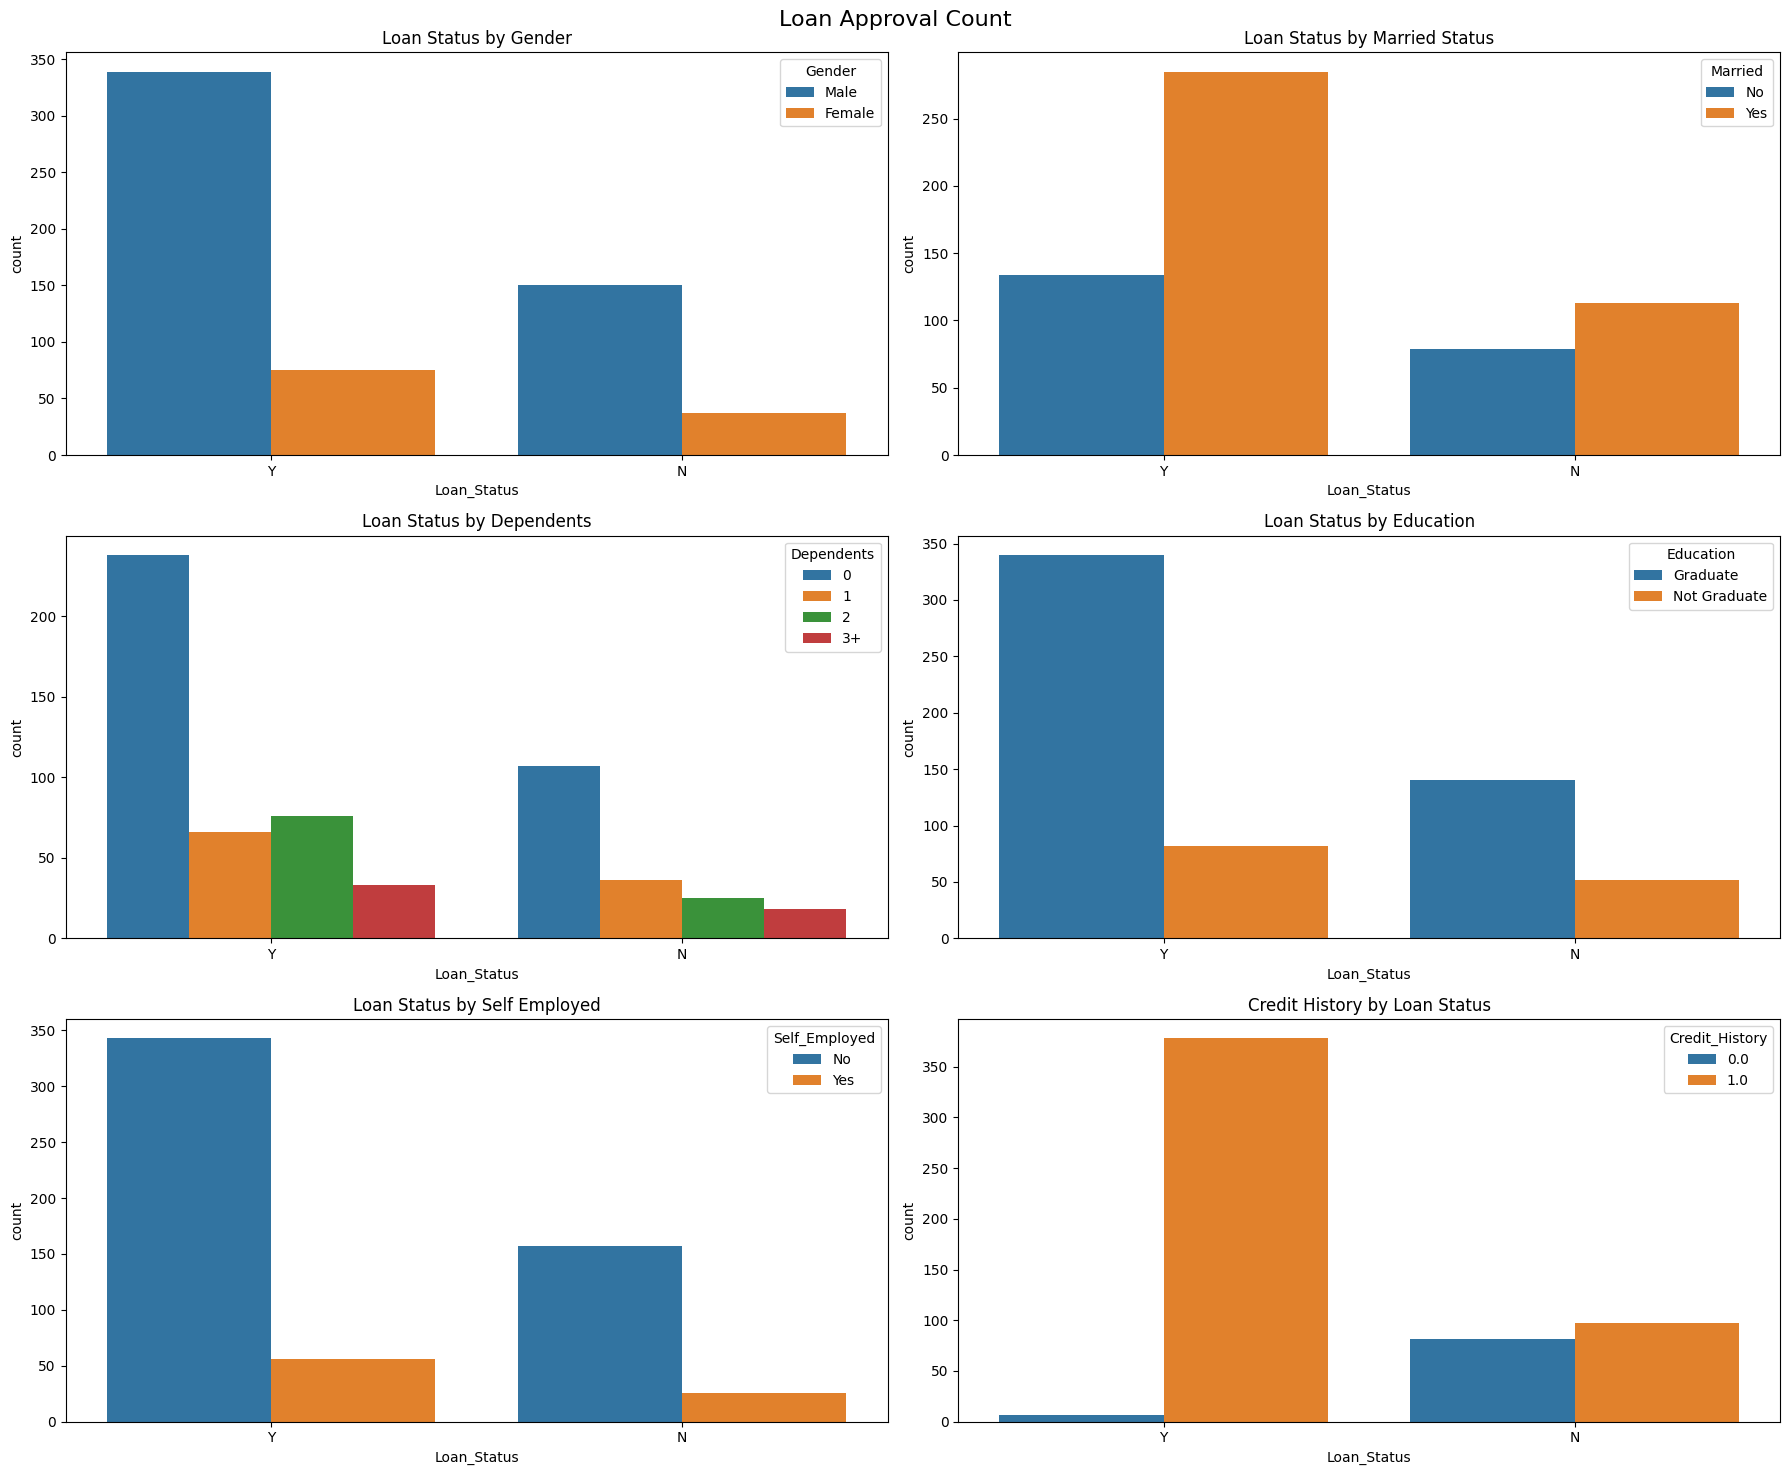

In [107]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()
sns.countplot(x='Loan_Status', hue='Gender', data=loan_dataset, ax=axes[0])
axes[0].set_title('Loan Status by Gender')
sns.countplot(x='Loan_Status', hue='Married', data=loan_dataset, ax=axes[1])
axes[1].set_title('Loan Status by Married Status')
sns.countplot(x='Loan_Status', hue='Dependents', data=loan_dataset, ax=axes[2])
axes[2].set_title('Loan Status by Dependents')
sns.countplot(x='Loan_Status', hue='Education', data=loan_dataset, ax=axes[3])
axes[3].set_title('Loan Status by Education')
sns.countplot(x='Loan_Status', hue='Self_Employed', data=loan_dataset, ax=axes[4])
axes[4].set_title('Loan Status by Self Employed')
sns.countplot(hue='Credit_History', x='Loan_Status', data=loan_dataset, ax=axes[5])
axes[5].set_title('Credit History by Loan Status')

for ax in axes[7:]:
    ax.axis('off')

fig.suptitle('Loan Approval Count', fontsize=16)
plt.tight_layout()
plt.show()

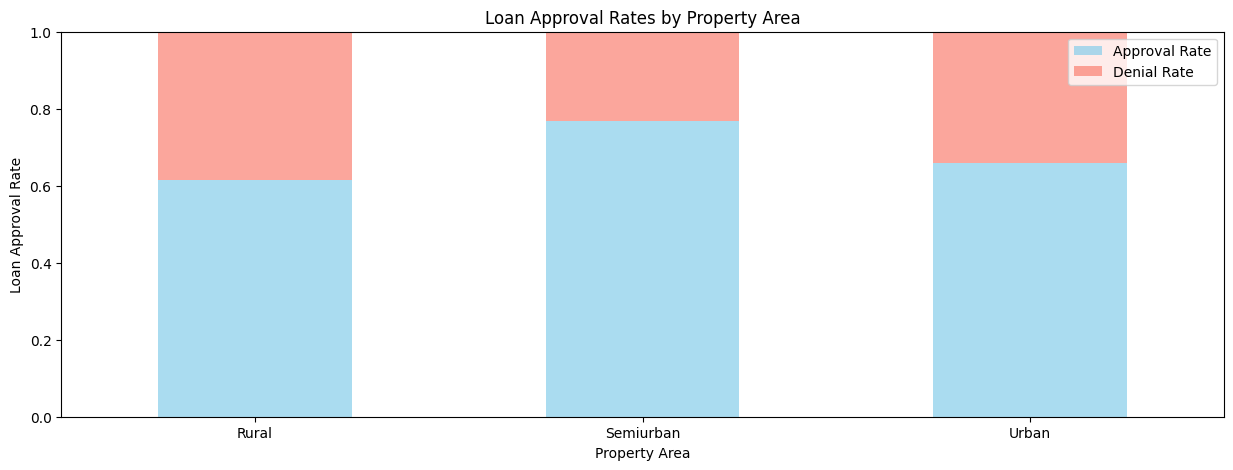

In [108]:
approval_rates = loan_dataset.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)
approval_rates['Approval_Rate']=approval_rates['Y']
approval_rates['Denial_Rate']=approval_rates['N']

plt.figure(figsize=(15, 5))
approval_rates['Approval_Rate'].plot(kind='bar', color='skyblue', alpha=0.7, label='Approval Rate')
approval_rates['Denial_Rate'].plot(kind='bar', color='salmon', alpha=0.7, label='Denial Rate', bottom=approval_rates['Approval_Rate'])

plt.title('Loan Approval Rates by Property Area')
plt.xticks(rotation=0)
plt.xlabel('Property Area')
plt.ylabel('Loan Approval Rate')
plt.legend()
plt.ylim(0, 1)
plt.show()

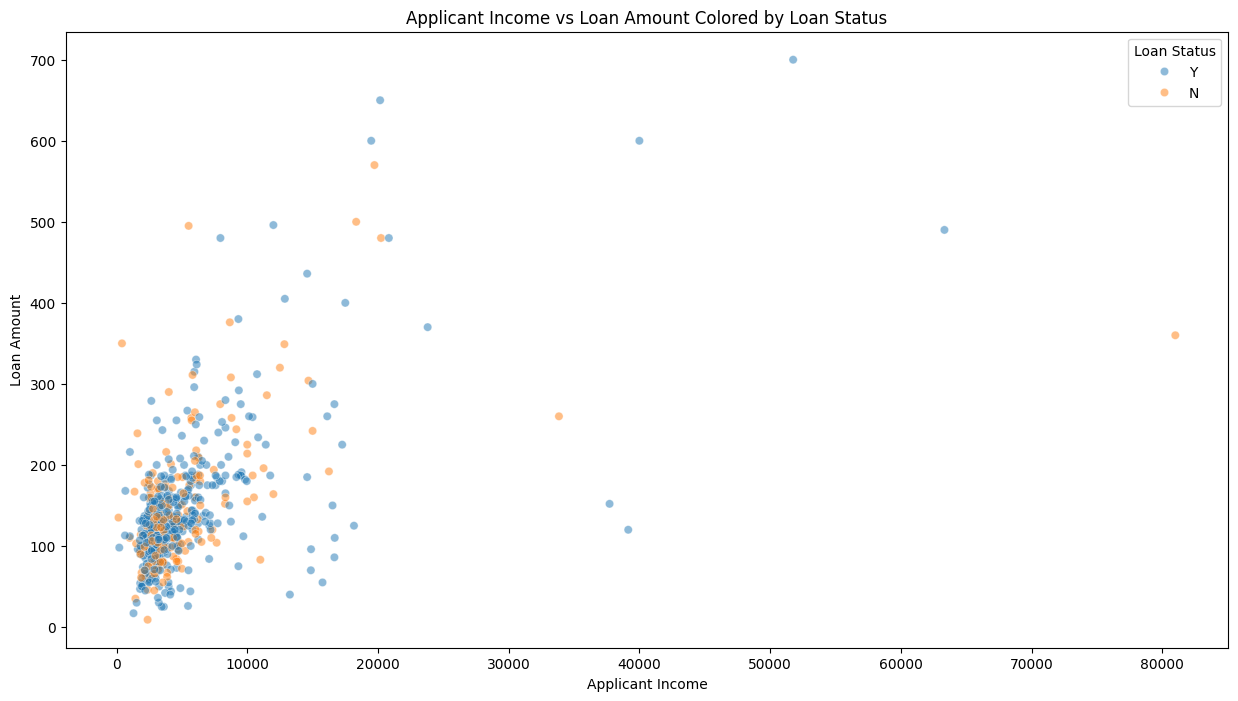

In [109]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=loan_dataset,x='ApplicantIncome',
                y='LoanAmount',
                hue='Loan_Status',
                alpha=0.5)
plt.title('Applicant Income vs Loan Amount Colored by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

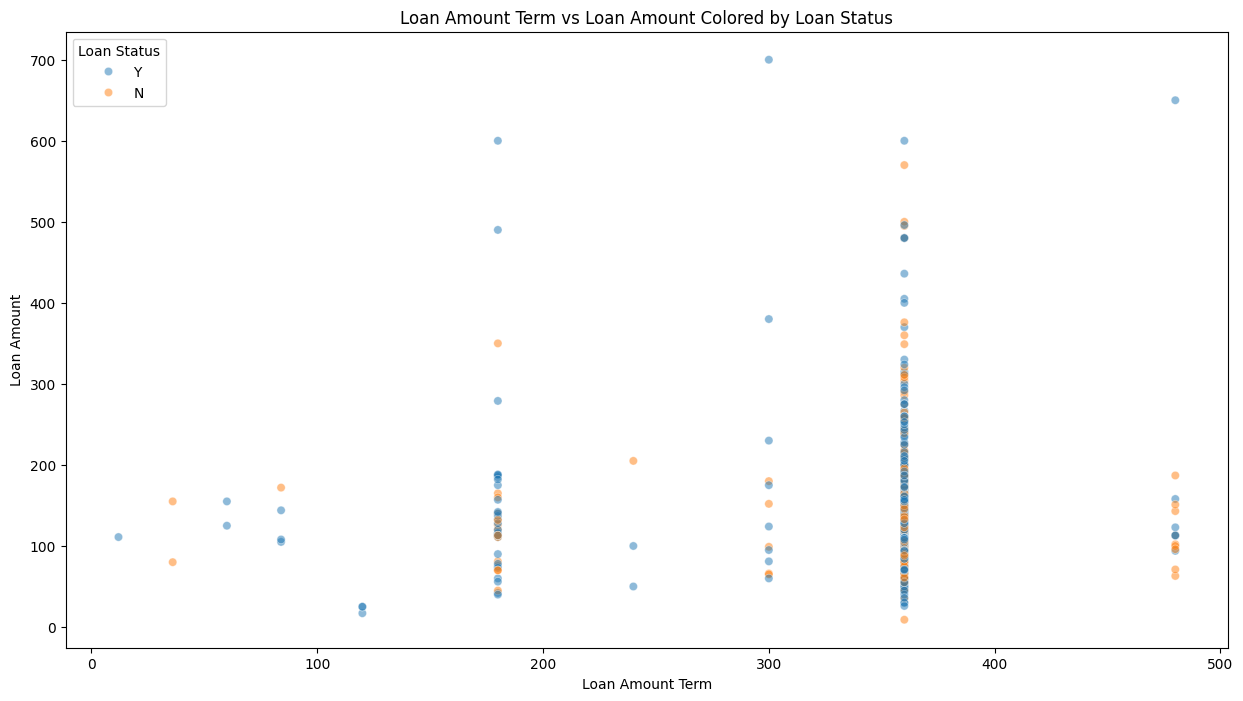

In [110]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=loan_dataset,x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',alpha=0.5)
plt.title('Loan Amount Term vs Loan Amount Colored by Loan Status')
plt.xlabel('Loan Amount Term')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

# Filling Null values

<Axes: >

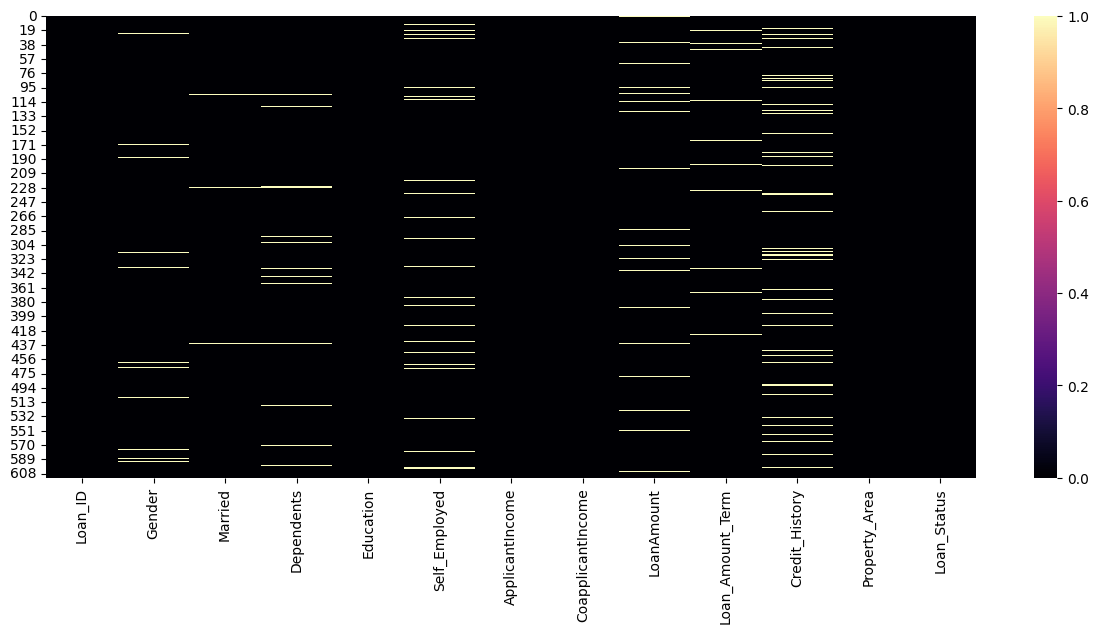

In [111]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_dataset.isnull(),cmap='magma') 

In [112]:
print(loan_dataset['Gender'].isnull().sum())
print(loan_dataset['Gender'].unique())
loan_dataset['Gender']=loan_dataset['Gender'].apply(lambda x: 1 if x=='Male' else 0)
loan_dataset['Gender']=loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Gender']=loan_dataset['Gender'].astype(int)
print(loan_dataset['Gender'].unique())

13
['Male' 'Female' nan]
[1 0]


In [113]:
print(loan_dataset['Married'].isnull().sum())
print(loan_dataset['Married'].unique())
loan_dataset['Married']=loan_dataset['Married'].apply(lambda x: 1 if x=='Yes' else 0)
loan_dataset['Married']=loan_dataset['Married'].fillna(loan_dataset['Gender'].mode()[0])
loan_dataset['Married']=loan_dataset['Married'].astype(int)
print(loan_dataset['Married'].unique())

3
['No' 'Yes' nan]
[0 1]


In [114]:
print(loan_dataset['Dependents'].isnull().sum())
print(loan_dataset['Dependents'].value_counts())

15
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [115]:
loan_dataset['Dependents']=loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0])
loan_dataset['Dependents']=loan_dataset['Dependents'].replace('3+','4')
loan_dataset['Dependents']=loan_dataset['Dependents'].astype(int)
# dependent values
loan_dataset['Dependents'].value_counts()
print(loan_dataset['Dependents'].isnull().sum())

0


In [116]:
print(loan_dataset['LoanAmount'].isnull().sum())
loan_dataset['LoanAmount']=loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].median())

22


In [117]:
print(loan_dataset['Loan_Amount_Term'].isnull().sum())
loan_dataset['Loan_Amount_Term']=loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].median())

14


In [118]:
print(loan_dataset['Credit_History'].isnull().sum())
loan_dataset['Credit_History']=loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0]).astype(int)

50


# Split Categorical variables

In [119]:
print(loan_dataset['Self_Employed'].isnull().sum())
print(loan_dataset['Self_Employed'].unique())
loan_dataset['Self_Employed']=loan_dataset['Self_Employed'].apply(lambda x: 0 if x=='No' else 1)
loan_dataset['Self_Employed']=loan_dataset['Self_Employed'].astype(int)

32
['No' 'Yes' nan]


In [120]:
print(loan_dataset['Loan_Status'].unique())
loan_dataset['Loan_Status']=loan_dataset['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)
loan_dataset['Loan_Status']=loan_dataset['Loan_Status'].astype(int)

['Y' 'N']


In [121]:
print(loan_dataset['Education'].value_counts())
print(loan_dataset['Education'].unique())
loan_dataset['Education']=loan_dataset['Education'].apply(lambda x: 1 if x=='Graduate' else 0)
loan_dataset['Education']=loan_dataset['Education'].astype(int)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
['Graduate' 'Not Graduate']


In [122]:
loan_dataset['Property_Area'].unique()
tdf=pd.get_dummies(loan_dataset['Property_Area'])
loan_dataset=pd.concat([loan_dataset,tdf],axis=1)
loan_dataset=loan_dataset.drop(columns='Property_Area')

In [123]:
loan_dataset[['Rural','Semiurban','Urban']]=loan_dataset[['Rural','Semiurban','Urban']].astype(int)

In [124]:
loan_dataset.drop(columns='Loan_ID',axis=1,inplace=True)

# Checking for Null values

In [125]:
loan_dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Rural                0
Semiurban            0
Urban                0
dtype: int64

In [126]:
loan_dataset=loan_dataset.drop_duplicates(inplace=False)
loan_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int32  
 10  Loan_Status        614 non-null    int32  
 11  Rural              614 non-null    int32  
 12  Semiurban          614 non-null    int32  
 13  Urban              614 non-null    int32  
dtypes: float64(3), int32(10), int64(1)
memory usage: 43.3 KB


# Removing Outliers

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

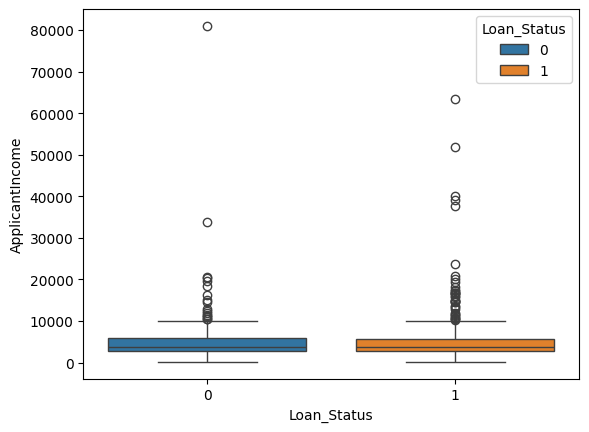

In [127]:
sns.boxplot(x='Loan_Status',data=loan_dataset,y='ApplicantIncome',hue='Loan_Status')

In [128]:
q1=loan_dataset['ApplicantIncome'].quantile(0.25)
q3=loan_dataset['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
loan_dataset=loan_dataset[(loan_dataset['ApplicantIncome']>=lb)&(loan_dataset['ApplicantIncome']<=ub)]

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

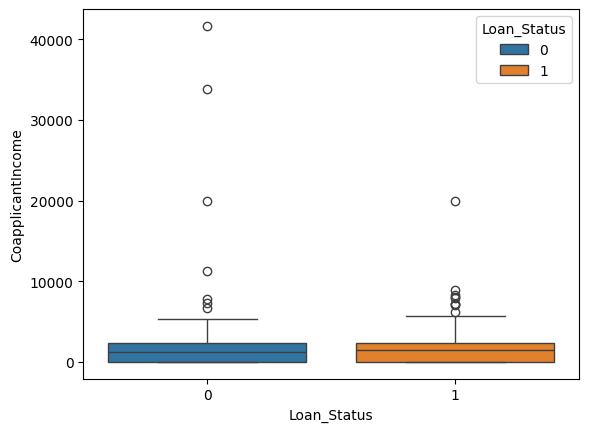

In [129]:
sns.boxplot(x='Loan_Status',data=loan_dataset,y='CoapplicantIncome',hue='Loan_Status')

In [130]:
q1=loan_dataset['CoapplicantIncome'].quantile(0.25)
q3=loan_dataset['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
loan_dataset=loan_dataset[(loan_dataset['CoapplicantIncome']>=lb)&(loan_dataset['CoapplicantIncome']<=ub)]

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

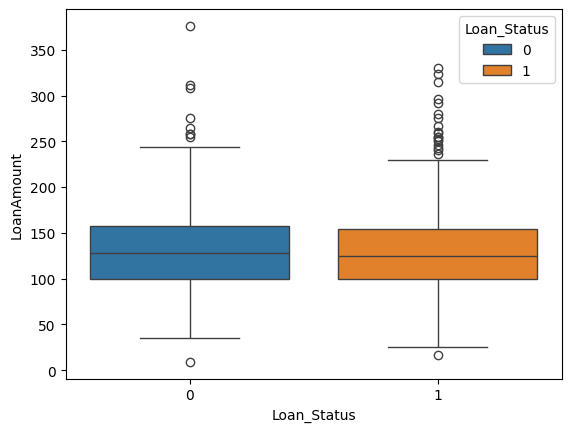

In [131]:
sns.boxplot(x='Loan_Status',data=loan_dataset,y='LoanAmount',hue='Loan_Status')

In [132]:
q1=loan_dataset['LoanAmount'].quantile(0.25)
q3=loan_dataset['LoanAmount'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
loan_dataset=loan_dataset[(loan_dataset['LoanAmount']>=lb)&(loan_dataset['LoanAmount']<=ub)]

In [133]:
from scipy.stats import spearmanr
df = loan_dataset.copy()
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']
for feature in x.columns:
    correlation, p_value = spearmanr(x[feature], y)
    print(f"Feature: {feature}, Spearman Correlation: {correlation}, p-value: {p_value}")

Feature: Gender, Spearman Correlation: 0.06711125106152109, p-value: 0.12641011969753882
Feature: Married, Spearman Correlation: 0.0712806640287466, p-value: 0.10446049617964888
Feature: Dependents, Spearman Correlation: -0.009179831241291778, p-value: 0.8345786091393697
Feature: Education, Spearman Correlation: 0.11747162067528237, p-value: 0.007326906156380624
Feature: Self_Employed, Spearman Correlation: 0.0048688011312119995, p-value: 0.9118072840656001
Feature: ApplicantIncome, Spearman Correlation: 0.0030501581400842986, p-value: 0.9446815085105291
Feature: CoapplicantIncome, Spearman Correlation: 0.0729246465916201, p-value: 0.09668368351195317
Feature: LoanAmount, Spearman Correlation: -0.00994629104804804, p-value: 0.8209913455179813
Feature: Loan_Amount_Term, Spearman Correlation: -0.02339972321460794, p-value: 0.594459660278479
Feature: Credit_History, Spearman Correlation: 0.5721948263677845, p-value: 1.4900225453396406e-46
Feature: Rural, Spearman Correlation: -0.109028603

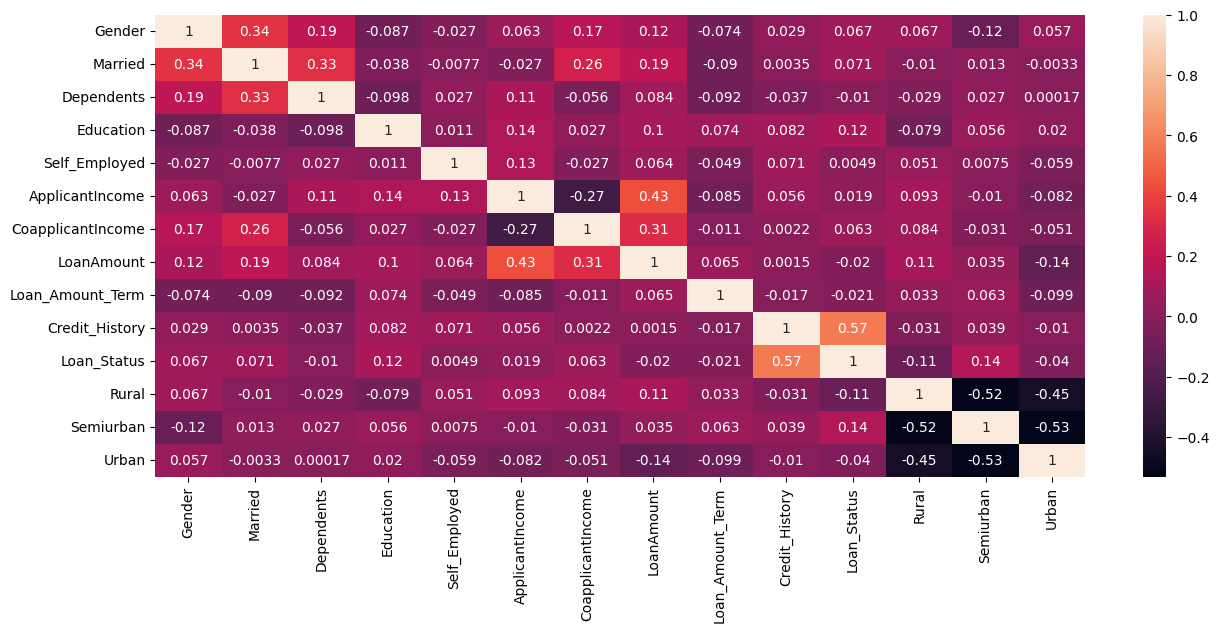

In [134]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Preparation

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']
x= MinMaxScaler().fit_transform(x)
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.25,random_state=20)

l_xtr=x_tr.copy()
l_xte=x_te.copy()
l_ytr=y_tr.copy()
l_yte=y_te.copy()

k_xtr=x_tr.copy()
k_xte=x_te.copy()
k_ytr=y_tr.copy()
k_yte=y_te.copy()

d_xtr=x_tr.copy()
d_xte=x_te.copy()
d_ytr=y_tr.copy()
d_yte=y_te.copy()

rf_xtr=x_tr.copy()
rf_xte=x_te.copy()
rf_ytr=y_tr.copy()
rf_yte=y_te.copy()

a_xtr=x_tr.copy()
a_xte=x_te.copy()
a_ytr=y_tr.copy()
a_yte=y_te.copy()

Models

In [137]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

### Logistic Regression

In [138]:
l=[i for i in range(1,1000,50)]
para={'penalty':['l1','l2'],'C':list(l),'max_iter':list(np.arange(10,500,5)),'solver': ['liblinear', 'saga']}
lreg=LogisticRegression(max_iter=10000)
nlreg=RandomizedSearchCV(lreg,scoring='accuracy',cv=10,param_distributions=para,n_jobs=-1,random_state=20)
nlreg.fit(l_xtr,l_ytr)
print(nlreg.best_params_)
print(nlreg.best_score_)
nlreg=nlreg.best_estimator_
pred_t=nlreg.predict(l_xtr)
pred=nlreg.predict(l_xte)

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 951}
0.8282051282051283


### K Nearest Neighbors

In [139]:
k=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,51))}
nk=RandomizedSearchCV(k,param_distributions=param,cv=10,random_state=20,n_jobs=-1,scoring='accuracy')
nk.fit(k_xtr,k_ytr)
print(nk.best_params_)
print(nk.best_score_)
nk=nk.best_estimator_
pred1_t=nk.predict(k_xtr)
pred1=nk.predict(k_xte)

{'n_neighbors': 9}
0.7769230769230769


### Decision Tree Classifier

In [140]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(d_xtr,d_ytr)
alphas=path.ccp_alphas
param={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(d_xtr,d_ytr)
print(ndt.best_params_)
print(ndt.best_score_)
ba=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 0.004674450492653677}
0.7769230769230768


In [141]:
dt=DecisionTreeClassifier(ccp_alpha=ba)
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,301)),'min_samples_leaf':list(np.arange(1,301)),
       'max_features':['sqrt','log2',None]}
ndt=RandomizedSearchCV(dt,param_distributions=param,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(d_xtr,d_ytr)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_
pred2_t=ndt.predict(d_xtr)
pred2=ndt.predict(d_xte)

{'min_samples_split': 255, 'min_samples_leaf': 226, 'max_features': 'log2', 'criterion': 'gini'}
0.7102564102564102


### Random Forest Classifier

In [142]:
rf=RandomForestClassifier()
param={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(1,51)),
       'max_features':['sqrt','log2',None],'n_estimators':[300]}
nrf=RandomizedSearchCV(rf,param_distributions=param,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(rf_xtr,rf_ytr)
print(nrf.best_params_)
print(nrf.best_score_)
nrf=nrf.best_estimator_
pred3_t=nrf.predict(rf_xtr)
pred3=nrf.predict(rf_xte)

{'n_estimators': 300, 'min_samples_split': 30, 'min_samples_leaf': 23, 'max_features': None, 'criterion': 'gini'}
0.8333333333333334


### AdaBoost Classifier

In [95]:
ada=AdaBoostClassifier(estimator=DecisionTreeClassifier(),algorithm='SAMME')
param_dist = {
    'n_estimators': [1000],  
    'learning_rate': list(np.arange(0.1,2.01,0.01)),  
    'estimator__max_depth': list(np.arange(1, 5)), 
}
random_search = RandomizedSearchCV(estimator=ada,
                                   param_distributions=param_dist,
                                   n_iter=10,            
                                   cv=5,                 
                                   random_state=42,   
                                   scoring='accuracy',   
                                   n_jobs=-1)    
random_search.fit(a_xtr, a_ytr)
print(random_search.best_params_)
print(random_search.best_score_)
random_search=random_search.best_estimator_
pred4_t=random_search.predict(a_xtr)
pred4=random_search.predict(a_xte)

{'n_estimators': 1000, 'learning_rate': 0.7699999999999997, 'estimator__max_depth': 1}
0.8256410256410256


In [96]:
tdf=pd.DataFrame({'Classification Algorithms':['Logistic Regression','K Nearest Neighbors','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Training Accuracy':[accuracy_score(l_ytr,pred_t),accuracy_score(k_ytr,pred1_t),accuracy_score(d_ytr,pred2_t),accuracy_score(rf_ytr,pred3_t),accuracy_score(a_ytr,pred4_t)],
                  'Training Precision':[precision_score(l_ytr,pred_t),precision_score(k_ytr,pred1_t),precision_score(d_ytr,pred2_t),precision_score(rf_ytr,pred3_t),precision_score(a_ytr,pred4_t)],
                  'Training Recall':[recall_score(l_ytr,pred_t),recall_score(k_ytr,pred1_t),recall_score(d_ytr,pred2_t),recall_score(rf_ytr,pred3_t),recall_score(a_ytr,pred4_t)],
                  'Training F1 Score':[f1_score(l_ytr,pred_t),f1_score(k_ytr,pred1_t),f1_score(d_ytr,pred2_t),f1_score(rf_ytr,pred3_t),f1_score(a_ytr,pred4_t)]})
tdf=tdf.sort_values(by='Training Accuracy').reset_index(drop=True)
tdf

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Decision Tree Classifier,0.710256,0.710256,1.000000,0.830585
1,K Nearest Neighbors,0.802564,0.790698,0.981949,0.876006
2,Random Forest Classifier,0.833333,0.817365,0.985560,0.893617
3,Logistic Regression,0.835897,0.819820,0.985560,0.895082
4,AdaBoost Classifier,0.858974,0.851266,0.971119,0.907251


In [97]:
tedf=pd.DataFrame({'Classification Algorithms':['Logistic Regression','K Nearest Neighbors','Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier'],
                  'Testing Accuracy':[accuracy_score(l_yte,pred),accuracy_score(k_yte,pred1),accuracy_score(d_yte,pred2),accuracy_score(rf_yte,pred3),accuracy_score(a_yte,pred4)],
                  'Testing Precision':[precision_score(l_yte,pred),precision_score(k_yte,pred1),precision_score(d_yte,pred2),precision_score(rf_yte,pred3),precision_score(a_yte,pred4)],
                  'Testing Recall':[recall_score(l_yte,pred),recall_score(k_yte,pred1),recall_score(d_yte,pred2),recall_score(rf_yte,pred3),recall_score(a_yte,pred4)],
                  'Testing F1 Score':[f1_score(l_yte,pred),f1_score(k_yte,pred1),f1_score(d_yte,pred2),f1_score(rf_yte,pred3),f1_score(a_yte,pred4)]})
tedf=tedf.sort_values(by='Testing Accuracy').reset_index(drop=True)
tedf

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Decision Tree Classifier,0.653846,0.653846,1.000000,0.790698
1,K Nearest Neighbors,0.715385,0.700000,0.988235,0.819512
2,AdaBoost Classifier,0.769231,0.777778,0.905882,0.836957
3,Logistic Regression,0.800000,0.770642,0.988235,0.865979
4,Random Forest Classifier,0.800000,0.770642,0.988235,0.865979


In [98]:
import pickle
with open('models/model_logistic_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(nlreg, model_file)

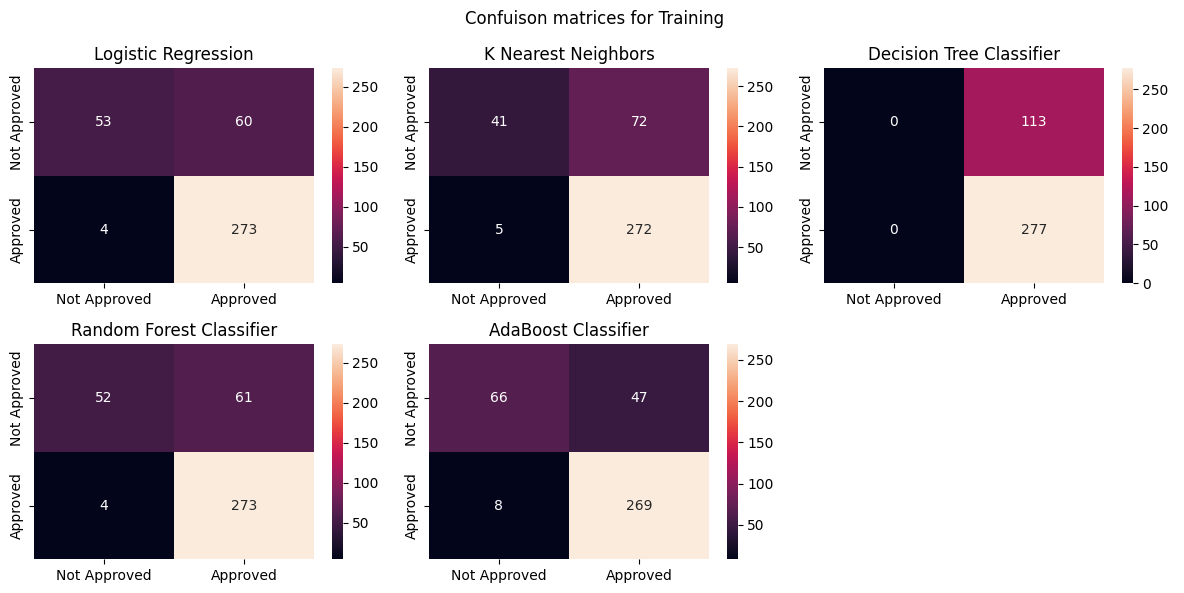

In [99]:
fig,axes=plt.subplots(2,3,figsize=(12,6))
labels = ['Not Approved', 'Approved']
sns.heatmap(confusion_matrix(l_ytr,pred_t),annot=True,ax=axes[0][0],fmt='g')
axes[0][0].set_title('Logistic Regression')
axes[0][0].set_xticklabels(labels)
axes[0][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(k_ytr,pred1_t),annot=True,ax=axes[0][1],fmt='g')
axes[0][1].set_title('K Nearest Neighbors')
axes[0][1].set_xticklabels(labels)
axes[0][1].set_yticklabels(labels)
sns.heatmap(confusion_matrix(d_ytr,pred2_t),annot=True,ax=axes[0][2],fmt='g')
axes[0][2].set_title('Decision Tree Classifier')
axes[0][2].set_xticklabels(labels)
axes[0][2].set_yticklabels(labels)
sns.heatmap(confusion_matrix(rf_ytr,pred3_t),annot=True,ax=axes[1][0],fmt='g')
axes[1][0].set_title('Random Forest Classifier')
axes[1][0].set_xticklabels(labels)
axes[1][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(a_ytr,pred4_t),annot=True,ax=axes[1][1],fmt='g')
axes[1][1].set_title('AdaBoost Classifier')
axes[1][1].set_xticklabels(labels)
axes[1][1].set_yticklabels(labels)
axes[1][2].axis('off')
plt.suptitle("Confuison matrices for Training")
plt.tight_layout()
plt.show()

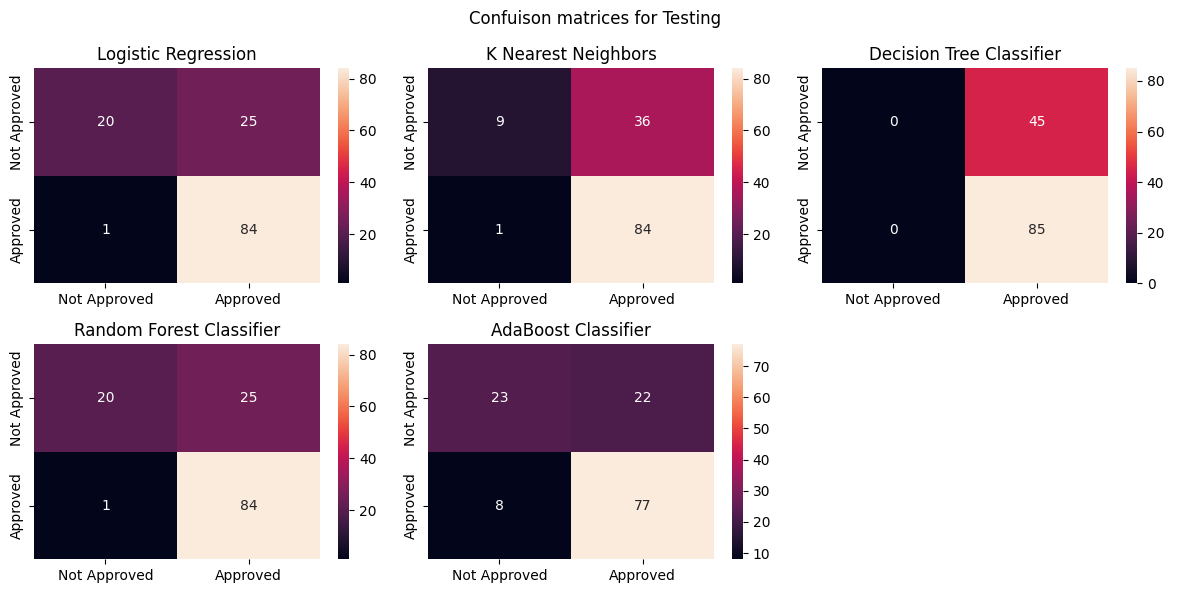

In [100]:
fig,axes=plt.subplots(2,3,figsize=(12,6))
labels = ['Not Approved', 'Approved']
sns.heatmap(confusion_matrix(l_yte,pred),annot=True,ax=axes[0][0])
axes[0][0].set_title('Logistic Regression')
axes[0][0].set_xticklabels(labels)
axes[0][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(k_yte,pred1),annot=True,ax=axes[0][1])
axes[0][1].set_title('K Nearest Neighbors')
axes[0][1].set_xticklabels(labels)
axes[0][1].set_yticklabels(labels)
sns.heatmap(confusion_matrix(d_yte,pred2),annot=True,ax=axes[0][2])
axes[0][2].set_title('Decision Tree Classifier')
axes[0][2].set_xticklabels(labels)
axes[0][2].set_yticklabels(labels)
sns.heatmap(confusion_matrix(rf_yte,pred3),annot=True,ax=axes[1][0])
axes[1][0].set_title('Random Forest Classifier')
axes[1][0].set_xticklabels(labels)
axes[1][0].set_yticklabels(labels)
sns.heatmap(confusion_matrix(a_yte,pred4),annot=True,ax=axes[1][1])
axes[1][1].set_title('AdaBoost Classifier')
axes[1][1].set_xticklabels(labels)
axes[1][1].set_yticklabels(labels)
axes[1][2].axis('off')
plt.suptitle("Confuison matrices for Testing")
plt.tight_layout()
plt.show()